In [1]:
suppressMessages(library(rethinking))
suppressMessages(library(tidyverse))

In [12]:
data(Laffer)

d_Laffer <- Laffer
head(d_Laffer)

,tax_rate,tax_revenue
,<dbl>,<dbl>
1,0.07,-0.06
2,8.81,2.45
3,12.84,3.58
4,16.24,2.19
5,19.18,2.46
6,19.29,1.95


In [13]:
write_csv(d_Laffer, "/Users/blacar/Documents/ds_projects/stats_rethinking/repo/other_data/Laffer.csv", col_names=TRUE)

In [2]:
## R code 7.1
sppnames <- c( "afarensis","africanus","habilis","boisei",
    "rudolfensis","ergaster","sapiens")
brainvolcc <- c( 438 , 452 , 612, 521, 752, 871, 1350 )
masskg <- c( 37.0 , 35.5 , 34.5 , 41.5 , 55.5 , 61.0 , 53.5 )
d <- data.frame( species=sppnames , brain=brainvolcc , mass=masskg )

## R code 7.2
d$mass_std <- (d$mass - mean(d$mass))/sd(d$mass)
d$brain_std <- d$brain / max(d$brain)

In [3]:
d

species,brain,mass,mass_std,brain_std
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
afarensis,438,37.0,-0.7794667,0.3244444
africanus,452,35.5,-0.9170196,0.3348148
habilis,612,34.5,-1.0087216,0.4533333
boisei,521,41.5,-0.3668079,0.3859259
rudolfensis,752,55.5,0.9170196,0.5570370
ergaster,871,61.0,1.4213804,0.6451852
sapiens,1350,53.5,0.7336157,1.0000000


In [6]:
## R code 7.3
m7.1 <- quap(
    alist(
        brain_std ~ dnorm( mu , exp(log_sigma) ),
        mu <- a + b*mass_std,
        a ~ dnorm( 0.5 , 1 ),
        b ~ dnorm( 0 , 10 ),
        log_sigma ~ dnorm( 0 , 1 )
    ), data=d )

## R code 7.4
m7.1_OLS <- lm( brain_std ~ mass_std , data=d )
post <- extract.samples( m7.1_OLS )

## R code 7.5
set.seed(12)
s <- sim( m7.1 )
r <- apply(s,2,mean) - d$brain_std
resid_var <- var2(r)
outcome_var <- var2( d$brain_std )
1 - resid_var/outcome_var

## R code 7.6
R2_is_bad <- function( quap_fit ) {
    s <- sim( quap_fit , refresh=0 )
    r <- apply(s,2,mean) - d$brain_std
    1 - var2(r)/var2(d$brain_std)
}

[1] 0.4774592

In [7]:
post <- extract.samples(m7.1)
head(post)

,a,b,log_sigma
,<dbl>,<dbl>,<dbl>
1,0.4303735,0.14288598,-2.217982
2,0.4739710,0.10157262,-1.882918
3,0.5529746,0.22895890,-1.219940
4,0.5443686,0.17798383,-1.437264
5,0.5745506,0.06786132,-1.173708
6,0.6611692,0.11013808,-1.770166


In [15]:
paste(min(post$a), max(post$a))

[1] "0.268691455352576 0.763419870196303"

In [14]:
round(min(post$a), 4)

[1] 0.2687

In [8]:
summary(m7.1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.5285424,0.06842441,0.41918693,0.6378978
b,0.1671103,0.07407835,0.04871876,0.2855018
log_sigma,-1.7067248,0.29377520,-2.17623436,-1.2372153


## Rethinking sigma

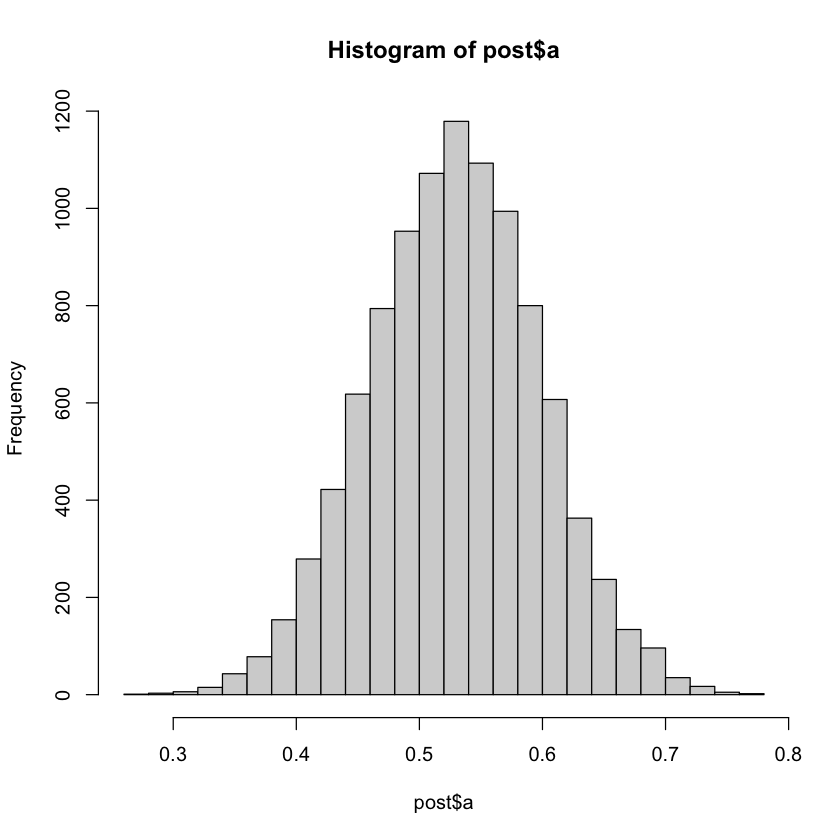

In [16]:
hist(post$a, n=20)

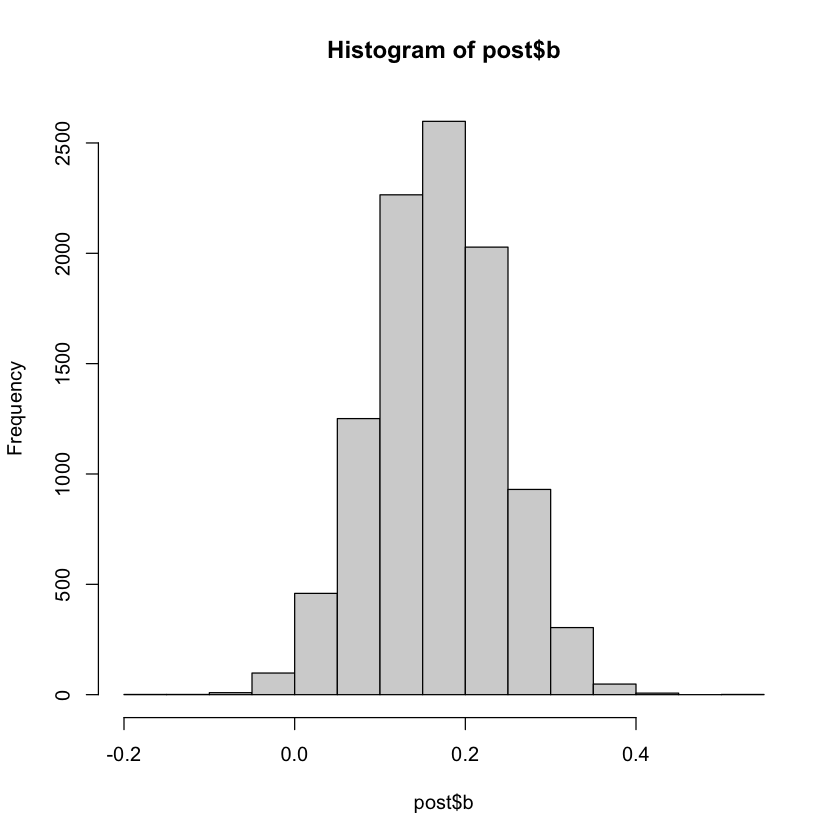

In [17]:
hist(post$b, n=20)

In [29]:
print(precis(post))

                mean         sd        5.5%      94.5%       histogram
a          0.5288421 0.06870984  0.41840911  0.6381058     ▁▁▁▂▅▇▇▂▁▁▁
b          0.1672433 0.07360742  0.04891979  0.2860760 ▁▁▁▁▁▃▇▇▅▂▁▁▁▁▁
log_sigma -1.7048149 0.29350049 -2.17657413 -1.2353687     ▁▁▁▃▇▇▅▃▁▁▁


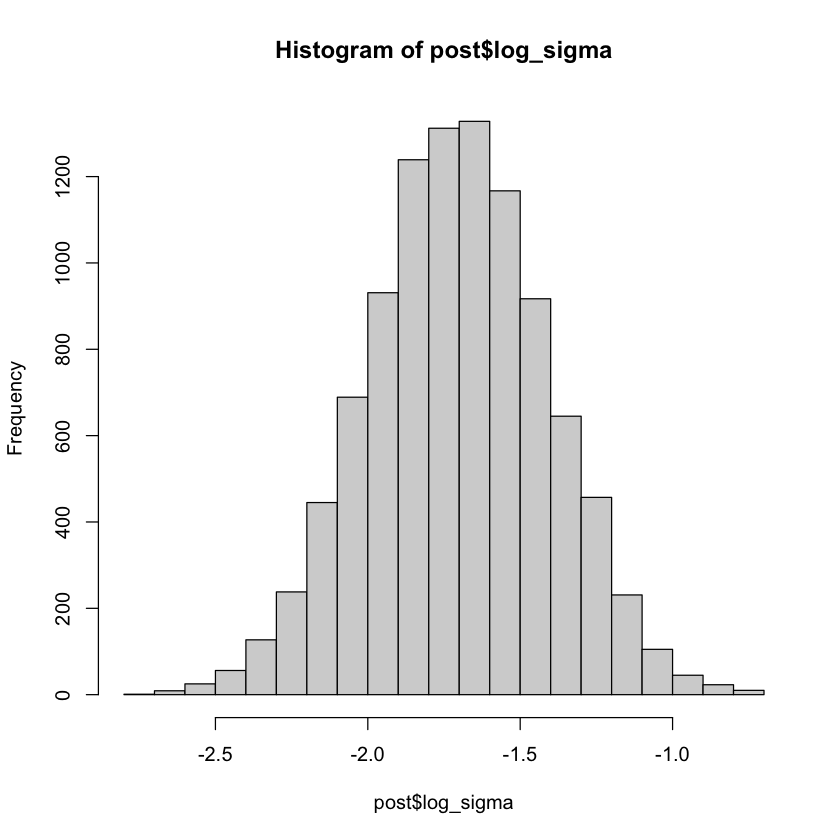

In [11]:
hist(post$log_sigma, n=20)

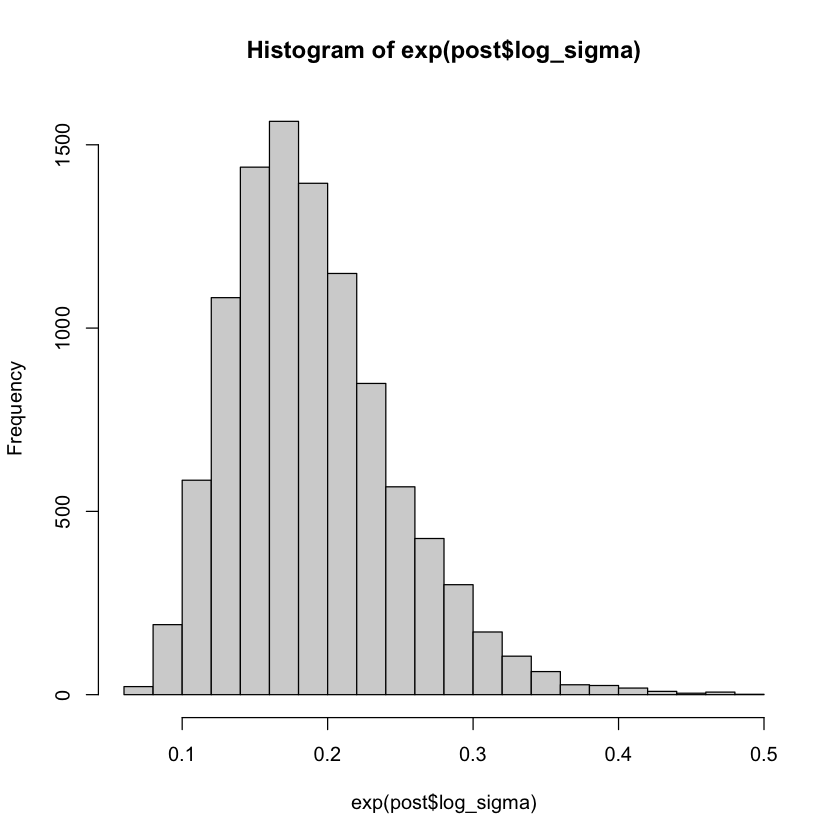

In [9]:
hist(exp(post$log_sigma), n=20)

In [10]:
mean(exp(post$log_sigma))

[1] 0.1898036

In [20]:
mean((post$log_sigma))

[1] -1.704815

In [42]:
?hist

In [ ]:
## R code 7.10
post <- extract.samples(m7.1)
mass_seq <- seq( from=min(d$mass_std) , to=max(d$mass_std) , length.out=100 )
l <- link( m7.1 , data=list( mass_std=mass_seq ) )
mu <- apply( l , 2 , mean )
ci <- apply( l , 2 , PI )
plot( brain_std ~ mass_std , data=d )
lines( mass_seq , mu )
shade( ci , mass_seq )

## R code 7.11
d_minus_i <- d[ -i , ]

## R code 7.12
p <- c( 0.3 , 0.7 )
-sum( p*log(p) )

# R code 7.13, running lppd

In [29]:
## R code 7.13
set.seed(1)
lppd( m7.1 , n=1e4 )

[1]  0.6098707  0.6483486  0.5496139  0.6234966  0.4648144  0.4347609 -0.8444619

In [12]:
lppd

function (fit, ...) 
{
    ll <- sim(fit, ll = TRUE, ...)
    n <- ncol(ll)
    ns <- nrow(ll)
    f <- function(i) log_sum_exp(ll[, i]) - log(ns)
    lppd <- sapply(1:n, f)
    return(lppd)
}
<bytecode: 0x7fd768422680>
<environment: namespace:rethinking>

In [27]:
rethinking::link

new("standardGeneric", .Data = function (fit, data, n = 1000, 
    ...) 
standardGeneric("link"), generic = "link", package = "rethinking", 
    group = list(), valueClass = character(0), signature = c("fit", 
    "data", "n"), default = new("derivedDefaultMethod", .Data = function (fit, 
        data, n = 1000, ...) 
    {
        print(class(fit))
    }, target = new("signature", .Data = "ANY", names = "fit", 
        package = "methods"), defined = new("signature", .Data = "ANY", 
        names = "fit", package = "methods"), generic = "link"), 
    skeleton = (new("derivedDefaultMethod", .Data = function (fit, 
        data, n = 1000, ...) 
    {
        print(class(fit))
    }, target = new("signature", .Data = "ANY", names = "fit", 
        package = "methods"), defined = new("signature", .Data = "ANY", 
        names = "fit", package = "methods"), generic = "link"))(fit, 
        data, n, ...))
<bytecode: 0x7fd746ce5320>
<environment: 0x7fd746c42718>
attr(,"generic")
[1] "link"
attr(,"generic")attr(,"package")
[1] "rethinking"
attr(,"package")
[1] "rethinking"
attr(,"group")
list()
attr(,"valueClass")
character(0)
attr(,"signature")
[1] "fit"  "data" "n"   
attr(,"default")
Method Definition (Class "derivedDefaultMethod"):

function (fit, data, n = 1000, ...) 
{
    print(class(fit))
}
<environment: namespace:rethinking>

Signatures:
        fit  
target  "ANY"
defined "ANY"
attr(,"skeleton")
(new("derivedDefaultMethod", .Data = function (fit, data, n = 1000, 
    ...) 
{
    print(class(fit))
}, target = new("signature", .Data = "ANY", names = "fit", package = "methods"), 
    defined = new("signature", .Data = "ANY", names = "fit", 
        package = "methods"), generic = "link"))(fit, data, n, 
    ...)
attr(,"class")
[1] "standardGeneric"
attr(,"class")attr(,"package")
[1] "methods"

In [28]:
rethinking::sim

new("standardGeneric", .Data = function (fit, data, n = 1000, 
    ...) 
standardGeneric("sim"), generic = "sim", package = "rethinking", 
    group = list(), valueClass = character(0), signature = c("fit", 
    "data", "n"), default = new("derivedDefaultMethod", .Data = function (fit, 
        data, n = 1000, ...) 
    {
        predict(fit)
    }, target = new("signature", .Data = "ANY", names = "fit", 
        package = "methods"), defined = new("signature", .Data = "ANY", 
        names = "fit", package = "methods"), generic = "sim"), 
    skeleton = (new("derivedDefaultMethod", .Data = function (fit, 
        data, n = 1000, ...) 
    {
        predict(fit)
    }, target = new("signature", .Data = "ANY", names = "fit", 
        package = "methods"), defined = new("signature", .Data = "ANY", 
        names = "fit", package = "methods"), generic = "sim"))(fit, 
        data, n, ...))
<bytecode: 0x7fd766f4a710>
<environment: 0x7fd766f08d68>
attr(,"generic")
[1] "sim"
attr(,"generic")attr(,"package")
[1] "rethinking"
attr(,"package")
[1] "rethinking"
attr(,"group")
list()
attr(,"valueClass")
character(0)
attr(,"signature")
[1] "fit"  "data" "n"   
attr(,"default")
Method Definition (Class "derivedDefaultMethod"):

function (fit, data, n = 1000, ...) 
{
    predict(fit)
}
<environment: namespace:rethinking>

Signatures:
        fit  
target  "ANY"
defined "ANY"
attr(,"skeleton")
(new("derivedDefaultMethod", .Data = function (fit, data, n = 1000, 
    ...) 
{
    predict(fit)
}, target = new("signature", .Data = "ANY", names = "fit", package = "methods"), 
    defined = new("signature", .Data = "ANY", names = "fit", 
        package = "methods"), generic = "sim"))(fit, data, n, 
    ...)
attr(,"class")
[1] "standardGeneric"
attr(,"class")attr(,"package")
[1] "methods"

In [25]:
help(sim)

# R code using ulam

In [24]:
d_slim <- d[, c("mass_std", "brain_std")]
d_slim

mass_std,brain_std
<dbl>,<dbl>
-0.7794667,0.3244444
-0.9170196,0.3348148
-1.0087216,0.4533333
-0.3668079,0.3859259
0.9170196,0.5570370
1.4213804,0.6451852
0.7336157,1.0000000


In [26]:
## R code 7.3
m7.1_u <- ulam(
    alist(
        brain_std ~ dnorm( mu , exp(log_sigma) ),
        mu <- a + b*mass_std,
        a ~ dnorm( 0.5 , 1 ),
        b ~ dnorm( 0 , 10 ),
        log_sigma ~ dnorm( 0 , 1 )
    ), data=d_slim, chains=4)


recompiling to avoid crashing R session




SAMPLING FOR MODEL '944ac2eda480f3e1cc570008060047c3' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.01104 seconds (Warm-up)
Chain 1:                0.008593 seconds (Sampling)
Chain 1:    

In [28]:
print(precis(m7.1_u))

                mean        sd       5.5%      94.5%     n_eff     Rhat4
a          0.5314547 0.1139576  0.3591425  0.7001277  931.0862 0.9993108
b          0.1653159 0.1230683 -0.0097373  0.3432974 1089.6040 1.0020764
log_sigma -1.3879292 0.3889182 -1.9250937 -0.7245722  609.4307 1.0098490


# R code 7.14, running lppd step-by-step

In [5]:
## R code 7.14
set.seed(1)
logprob <- sim( m7.1 , ll=TRUE , n=1e4 )

In [14]:
prob <- sim( m7.1 , ll=FALSE , n=1e4 )

In [15]:
prob

0.52126798,0.5162750,0.43899979,0.1633693,0.5313523,0.4322937,0.4246548
0.40853512,0.2138030,0.17579356,0.1475434,0.5075439,0.6714141,0.3767420
0.59615015,0.2278049,0.64901311,0.8467154,0.8756017,0.7407723,0.7278231
0.42996320,0.3691631,0.58787985,0.4989607,0.5280107,0.6070515,0.3152445
0.11318481,0.1189642,0.26405015,0.5541280,0.6572143,0.6216979,0.5154358
0.23113174,0.5585194,0.66111155,0.3373033,0.5873164,0.8022386,0.5092744
0.05487024,-0.0441793,0.24179893,0.8089892,0.4094673,1.3123029,0.8650496
0.24629913,0.6828795,-0.11996564,0.2314384,0.5462493,0.7976976,0.6495432
0.63473504,0.5478410,0.58059220,0.7706642,0.7606872,0.6461984,0.5845011
0.49072753,0.2380181,0.60810589,0.6549700,0.8255715,0.6539879,0.4132728
0.12652744,0.3956943,0.13037088,0.6072102,0.6453803,0.6552093,0.4430543


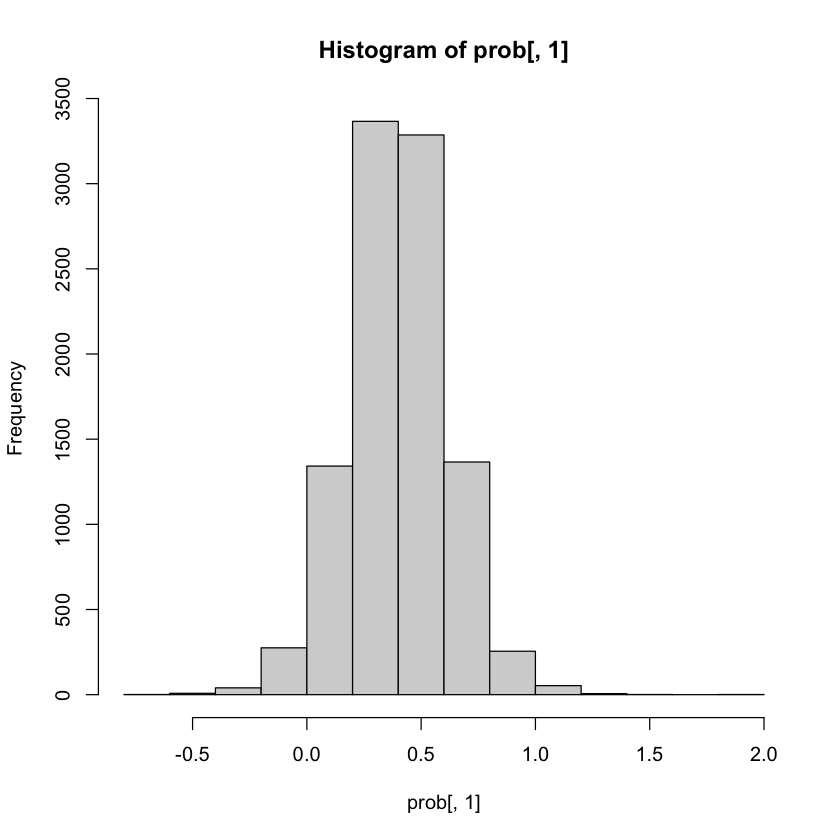

In [18]:
hist(prob[,1])

In [19]:
mean(prob[,1])

[1] 0.4000186

In [7]:
dim(logprob)

[1] 10000     7

In [6]:
logprob

0.56336333,0.7001182,0.9653925,0.65937452,0.80852059,0.91167154,-2.136957349
0.42059086,0.5069945,0.7337455,0.51476617,0.66757123,0.72433771,-1.334647416
0.83341125,0.9220808,0.9443629,0.92656874,1.03051840,1.00786556,-3.968644998
0.31858307,0.3183674,0.2070635,0.31700940,0.27275956,0.20835972,-1.452834628
0.31308741,0.4259766,0.6881041,0.34633282,0.36342323,0.44840337,-0.473020473
0.85190387,0.9494489,0.8960962,0.88584373,0.90916110,0.97614999,-2.841480720
0.64429700,0.6302591,0.3255910,0.64405188,0.64392822,0.64396915,-1.787352595
0.48013985,0.5379236,0.5091364,0.43402966,0.15235516,0.09461411,-0.166761952
0.06019923,0.2014875,0.5740562,0.06077152,-0.04079612,0.02757968,0.078138748
0.82996827,0.8770298,0.5342184,0.70614064,-0.35362023,-0.79600930,-0.087082449
0.26299375,0.3068939,0.3214841,0.23508893,0.07179418,0.04717317,-0.110934065


In [21]:
n <- ncol(logprob)
ns <- nrow(logprob)


In [22]:
n

[1] 7

In [23]:
ns

[1] 10000

ERROR: Error in `[.data.frame`(d, -i, ): object 'i' not found


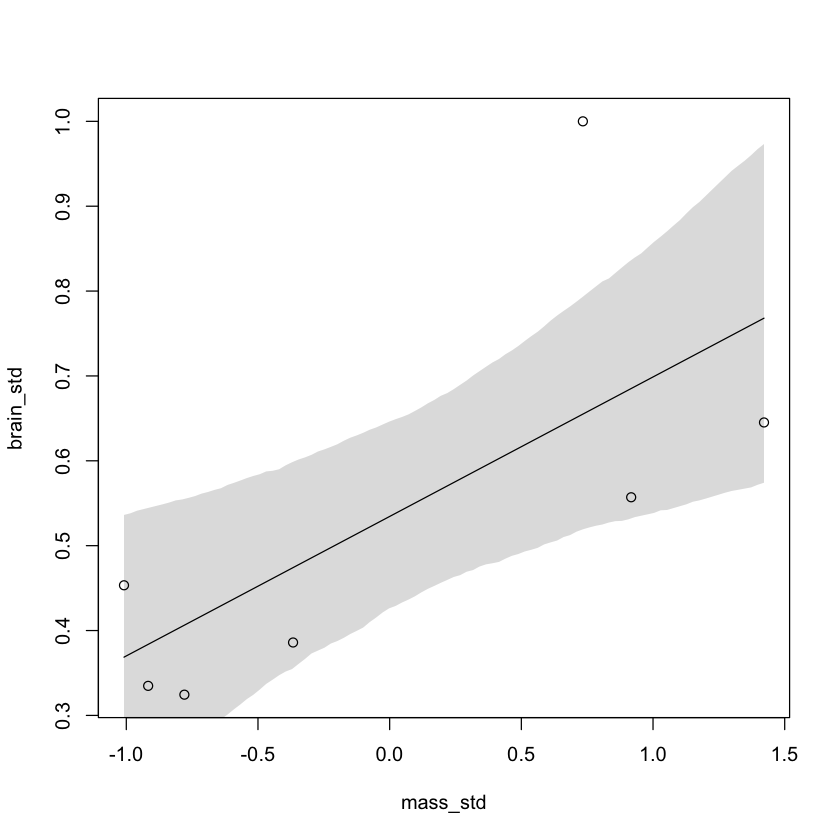

In [3]:
f <- function( i ) log_sum_exp( logprob[,i] ) - log(ns)


( lppd <- sapply( 1:n , f ) )

In [8]:
log_sum_exp(10)

[1] 10